# Numpy

In this section we will be exploring the numpy (numerical python) library. This is probably one of the most used libraries and it provides functionality to perform all kinds of scientific computing. The reason you want to use this library when doing larger computations is because in the background it is implemented in the c programming language. This is a much lower level language with a lot less overhead which makes it many times faster than python. This library provides a vast amount of functionality, which we can hardly touch upon in a short tutorial. But we will try to show you some of its basics.

## Arrays

First lets import the library so we can use it. Because this library is used so often it is often imported as np, this way there is no need to completely spell out numpy every time you want to use it.

In [59]:
import numpy as np

Lets instanciate a simple numpy array.

In [60]:
arr = np.array([3, 65, 2, 43, 734, 562, 1, 342])
print(arr)

[  3  65   2  43 734 562   1 342]


In numpy we can also easily create 2D or 3D arrays. 

In [61]:
arr = np.array([[1, 2, 3, 4], [5, 6, 7, 8]])
print(arr)

[[1 2 3 4]
 [5 6 7 8]]


In [62]:
arr = np.array([[[1, 2, 3], [4, 5, 6]], [[7, 8, 9], [10, 11, 12]]])
print(arr)

[[[ 1  2  3]
  [ 4  5  6]]

 [[ 7  8  9]
  [10 11 12]]]


We can easily retrieve the number of dimensions and the size of each dimension.

In [63]:
print(arr.ndim)
print(arr.shape)

3
(2, 2, 3)


### Indexing

Numpy arrays support slicing and indexing just like normal lists.

In [64]:
arr = np.array([3, 65, 2, 43, 734, 562, 1, 342])
print(arr[0])
print(arr[0:3])
print(arr[0:6:2])
print(arr[-1])

3
[ 3 65  2]
[  3   2 734]
342


However, the syntax is a little different when we try to acces multidimensional arrays.

For the built-in list datatype, if we want to acces an element we would do that as follows.

In [65]:
l = [[1, 2, 3, 4], [5, 6, 7, 8]]
print(l[1][2])

7


For numpy arrays, we use a slightly different syntax.

In [66]:
arr = np.array(l)
print(arr[1,2])

7


When indexing higher dimensional arrays, the first index indicates what part of the first dimension of the array you want to retrieve. Each subsequent index indicates the same for higher level dimensions in the numpy array. The different demensions are often referred to as an axis, starting with axis=0 representing the first dimensions. You can still use slices over the different dimensions.

In [67]:
print(arr[:2,2:])

[[3 4]
 [7 8]]


You can also select specific columns or rows.

In [98]:
print(arr[[0,1], [2, 3]])

[3 8]


We can also retrieve values based on an array of similar dimensions filled with booleans. The values at the locations that are true, are returned. This is referred to as a boolean mask.

In [69]:
l = [[False, False, True, False], [True, False, False, True]]
b = np.array(l)
print(arr[b])

[3 5 8]


This can be very useful if you want to retrieve values based on a certain condition.

In [71]:
print(arr > 3)
print(arr[arr > 3])

[[False False False  True]
 [ True  True  True  True]]
[4 5 6 7 8]


## Datatypes

Numpy has a lot more datatypes than the datatypes we have seen up to now. We will not go into detail into all the different datatypes, but if you want to see what is available, take a look [here](https://numpy.org/doc/stable/reference/arrays.dtypes.html). Unalike the built-in list, numpy arrays cannot contain data of different types. You can retrieve the data type of a numpy array using the ```dtype``` attribute.

In [53]:
print(arr.dtype)

int64


## Reshaping

Sometimes, data is not in the shape you would like to have it. For this, there is a usefull function that reshapes your array to the desired shape. You pass the shape you would like as a tuple, containing the desired size of each dimension. One dimensions may be unknown, and numpy will derive its size for you. This can be indicated with -1.

In [54]:
print(arr)
arr = arr.reshape(-1)
print(arr)
arr = arr.reshape(4, -1)
print(arr)

[[1 2 3 4]
 [5 6 7 8]]
[1 2 3 4 5 6 7 8]
[[1 2]
 [3 4]
 [5 6]
 [7 8]]


## Operations on arrays

You do not want to iterate over numpy arrays. There is usually a faster method that does not require iteration (iterating over a arrays is quite slow). Lets say we want to square every elemenet in an array. To do this you can simply apply the numpy square function on the array. The function will then be applied to every individual element. This also works for other functions and operations like addition or subtraction, etc.

In [81]:
l = np.arange(10)
print(l)
print(np.square(l))

[0 1 2 3 4 5 6 7 8 9]
[ 0  1  4  9 16 25 36 49 64 81]


In [86]:
print(l + 1)
print(l - 4)
print(l // 3)
print(l ** 3)

[ 1  2  3  4  5  6  7  8  9 10]
[-4 -3 -2 -1  0  1  2  3  4  5]
[0 0 0 1 1 1 2 2 2 3]
[  0   1   8  27  64 125 216 343 512 729]


We can also do operations over certains axis. For example to get the sum of all values in each column or the sum of al values in each row or the mean.

In [89]:
l = np.reshape(np.arange(24), (4, 6))
print(l)

print(np.sum(l, axis=0))
print(np.sum(l, axis=1))

print(np.mean(l, axis=0))
print(np.mean(l, axis=1))

[[ 0  1  2  3  4  5]
 [ 6  7  8  9 10 11]
 [12 13 14 15 16 17]
 [18 19 20 21 22 23]]
[36 40 44 48 52 56]
[ 15  51  87 123]
[ 9. 10. 11. 12. 13. 14.]
[ 2.5  8.5 14.5 20.5]


Lets say we do not want to add only one value to a numpy array, but a certain value to every column in an array. To do this, we can make use of broadcasting. When using broadcasting, an array which is used to perform an operation is extended to have the same shape as the array on which the operations is being performed. In the following example it is along the axis 0.

In [90]:
print(l)

[[ 0  1  2  3  4  5]
 [ 6  7  8  9 10 11]
 [12 13 14 15 16 17]
 [18 19 20 21 22 23]]


In [93]:
print(l + np.array([1, 2, 3, 4, 5, 6]))

[[ 1  3  5  7  9 11]
 [ 7  9 11 13 15 17]
 [13 15 17 19 21 23]
 [19 21 23 25 27 29]]


This can also be done over axis 1, to add a specific value to each row.

In [100]:
print(l + np.array([[1],[2],[3],[4]]))

[[ 1  2  3  4  5  6]
 [ 8  9 10 11 12 13]
 [15 16 17 18 19 20]
 [22 23 24 25 26 27]]


In [101]:
print(np.array([[1],[2],[3],[4]]) + np.array([1, 1, 1, 1, 1]))

[[2 2 2 2 2]
 [3 3 3 3 3]
 [4 4 4 4 4]
 [5 5 5 5 5]]


## Randomness

Numpy also support sampeling all kinds of probability distributions. Lets generate an array of random floats sampled on a uniform distribution (that is each element has an equaly likely chance of being selected).

In [106]:
from numpy import random
print(random.uniform(low=0.0, high=1.0, size=(10)))
print(random.uniform(low=0.0, high=1.0, size=(2,3)))

[0.81860043 0.5882761  0.7351591  0.76617119 0.67111689 0.71176375
 0.04426709 0.9940592  0.76788662 0.76236618]
[[0.50480687 0.00435814 0.24683352]
 [0.78136551 0.18368062 0.37771293]]


# Matplotlib

It might be intersting to visualize some of the data we are working with. To do that, we can use an additional library, matplotlib. First lets import the things we need.

Note: You might first need to install matplotlib using pip3.

In [109]:
import matplotlib.pyplot as plt

Lets first visualize a simple formula.

$y = 3x + 2$

First we need an array of datapoints $x$ for which we want to calculate $y$. To make these datapoints, ```np.linspace()``` is a very usefull function. It generates a number of evenly spaced datapoints over a certain interval.

In [112]:
xs = np.linspace(0, 10, 100)
print(xs)

[ 0.          0.1010101   0.2020202   0.3030303   0.4040404   0.50505051
  0.60606061  0.70707071  0.80808081  0.90909091  1.01010101  1.11111111
  1.21212121  1.31313131  1.41414141  1.51515152  1.61616162  1.71717172
  1.81818182  1.91919192  2.02020202  2.12121212  2.22222222  2.32323232
  2.42424242  2.52525253  2.62626263  2.72727273  2.82828283  2.92929293
  3.03030303  3.13131313  3.23232323  3.33333333  3.43434343  3.53535354
  3.63636364  3.73737374  3.83838384  3.93939394  4.04040404  4.14141414
  4.24242424  4.34343434  4.44444444  4.54545455  4.64646465  4.74747475
  4.84848485  4.94949495  5.05050505  5.15151515  5.25252525  5.35353535
  5.45454545  5.55555556  5.65656566  5.75757576  5.85858586  5.95959596
  6.06060606  6.16161616  6.26262626  6.36363636  6.46464646  6.56565657
  6.66666667  6.76767677  6.86868687  6.96969697  7.07070707  7.17171717
  7.27272727  7.37373737  7.47474747  7.57575758  7.67676768  7.77777778
  7.87878788  7.97979798  8.08080808  8.18181818  8

Now lets apply our function to these xs.

In [114]:
ys = 3 * xs + 2
print(ys)

[ 2.          2.3030303   2.60606061  2.90909091  3.21212121  3.51515152
  3.81818182  4.12121212  4.42424242  4.72727273  5.03030303  5.33333333
  5.63636364  5.93939394  6.24242424  6.54545455  6.84848485  7.15151515
  7.45454545  7.75757576  8.06060606  8.36363636  8.66666667  8.96969697
  9.27272727  9.57575758  9.87878788 10.18181818 10.48484848 10.78787879
 11.09090909 11.39393939 11.6969697  12.         12.3030303  12.60606061
 12.90909091 13.21212121 13.51515152 13.81818182 14.12121212 14.42424242
 14.72727273 15.03030303 15.33333333 15.63636364 15.93939394 16.24242424
 16.54545455 16.84848485 17.15151515 17.45454545 17.75757576 18.06060606
 18.36363636 18.66666667 18.96969697 19.27272727 19.57575758 19.87878788
 20.18181818 20.48484848 20.78787879 21.09090909 21.39393939 21.6969697
 22.         22.3030303  22.60606061 22.90909091 23.21212121 23.51515152
 23.81818182 24.12121212 24.42424242 24.72727273 25.03030303 25.33333333
 25.63636364 25.93939394 26.24242424 26.54545455 26.

So how do we now visualize this function? To do this, we can pass the arrays of xs and corresponding ys to matplotlib ```plot()``` function.

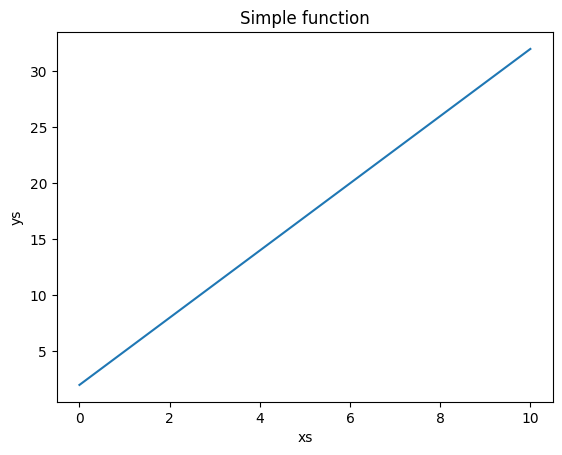

In [140]:
plt.plot(xs, ys)
plt.xlabel("xs")
plt.ylabel("ys")
plt.title("Simple function")
plt.show()

Lets add some noise to this data. We can use some parameters to represent datapoints in a clear way.

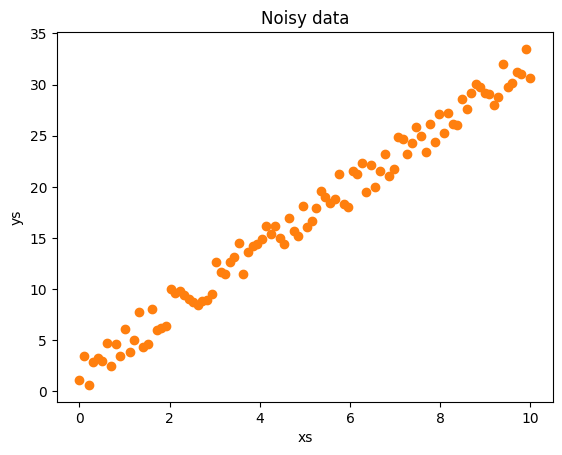

In [148]:
noisy_ys = ys + random.uniform(0.0, 4.0, ys.shape) - 2
plt.plot(xs, noisy_ys, color='C1', marker="o", linestyle="")
plt.xlabel("xs")
plt.ylabel("ys")
plt.title("Noisy data")
plt.show()

Lets say that all we have is the noisy data, maybe it is data that we measured somewhere and we want to discover the relation the ys have to the xs.

We could assume there might be some linear relationship between these measurements. We could test if we can fit a linear function onto these datapoints. One method of doing this, is the least squares method. If you want to learn more about least squares, take a look [here](https://en.wikipedia.org/wiki/Least_squares) (you will need some understanding of linear algebra).

In [149]:
from numpy import linalg

In [161]:
A = np.vstack([xs, np.ones(len(xs))]).T
(a, b) = linalg.lstsq(A, ys, rcond=None)[0]
print(a, b)

3.0 2.0000000000000013


We can see that the original parameters of the polynomials formed the best fit. Lets use these parameters to plot the fitted curve.

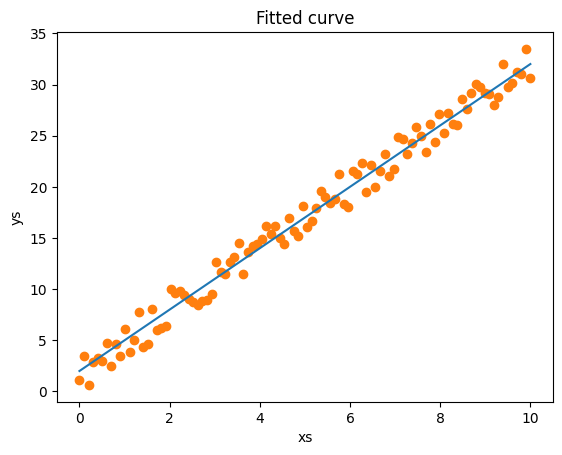

In [163]:
plt.plot(xs, noisy_ys, color='C1', marker="o", linestyle="")
plt.plot(xs, a*xs +b, color='C0')
plt.xlabel("xs")
plt.ylabel("ys")
plt.title("Fitted curve")
plt.show()

It is clear we have made a good approximation of the original function.

## CSV

The last thing we will take a short look at are CSV files, short for comma seperated values. It is a format that is often used to store data.

For this example lets take a look at the growth of the dutch population. You can find where the data is retrieved [here](https://www.cbs.nl/nl-nl/visualisaties/dashboard-bevolking/bevolkingsgroei/groei) on CBS.

In the cell below there is a bit of code that automatically downloads the data for you.
You will need to install the cbsodata and pandas packages if you do not already have those.

In [184]:
import cbsodata
import pandas as pd

First we will download the data. We will use pandas to retrieve the data from the downloaded table. Pandas provides some extra functionality on top of numpy. Don't worry if you cannot completely understand what happens here.

In [185]:
data = pd.DataFrame(cbsodata.get_data("37296ned"))

In [186]:
print(data)

    ID Perioden  TotaleBevolking_1  Mannen_2  Vrouwen_3  TotaleBevolking_4  \
0    0     1950           10026773   4998251    5028522           10026773   
1    1     1951           10200280   5083759    5116521           10200280   
2    2     1952           10328343   5145772    5182571           10328343   
3    3     1953           10435631   5198033    5237598           10435631   
4    4     1954           10550737   5256108    5294629           10550737   
..  ..      ...                ...       ...        ...                ...   
68  68     2018           17181084   8527041    8654043           17181084   
69  69     2019           17282163   8581086    8701077           17282163   
70  70     2020           17407585   8648031    8759554           17407585   
71  71     2021           17475415   8686536    8788879           17475415   
72  72     2022           17590672   8745468    8845204           17590672   

    Ongehuwd_5  Gehuwd_6  Verweduwd_7  Gescheiden_8  ...  \
0  

In [198]:
data = data.loc[:, ["Perioden", "TotaleBevolking_1"]]
data.to_csv("population_size.csv")
print(data)

   Perioden  TotaleBevolking_1
0      1950           10026773
1      1951           10200280
2      1952           10328343
3      1953           10435631
4      1954           10550737
..      ...                ...
68     2018           17181084
69     2019           17282163
70     2020           17407585
71     2021           17475415
72     2022           17590672

[73 rows x 2 columns]


In [196]:
data_np = data.to_numpy()
population_size = data_np.astype(np.int64)
print(population_size[:10])
print(population_size.dtype)
print(population_size.shape)

[[    1950 10026773]
 [    1951 10200280]
 [    1952 10328343]
 [    1953 10435631]
 [    1954 10550737]
 [    1955 10680023]
 [    1956 10821661]
 [    1957 10957040]
 [    1958 11095726]
 [    1959 11278024]]
int64
(73, 2)


Now the data has been converted to a numpy array. We can see that the dataset contains 73 rows. One for each year since 1950. The first column contains the year, the second the size of the population in that year. We have also stored the data as a csv file, so you can take a look at the format in which it is stored if you go to the overview of all the notebooks (population_size.csv). Numpy provides all kinds of methods to retrieve data from csv files.

Lets see what the data looks like.

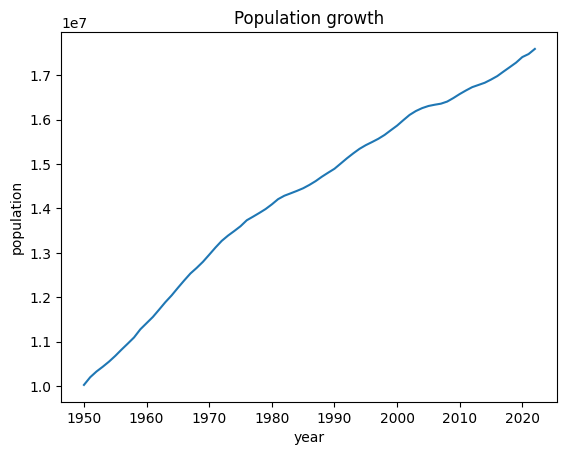

In [203]:
plt.plot(population_size[:, 0], population_size[:, 1])
plt.xlabel("year")
plt.ylabel("population")
plt.title("Population size")
plt.show()

See if you can figure out how to tackle to following problems in the cells below.
- How much did the population grow on average?
- How much did the population grow on average between 1954 and 1971?
- Visualize the population growth (the difference between each subsequent datapoint)
- Find the years with the highest and lowest growth